In [70]:
from OperacionesCSV import importar_CSV
from Neo4HungerGames import Neo4HungerGames
from Neo4Dataframes import Neo4Dataframes
import pandas as pd
import matplotlib.pyplot as plt
from flask import Flask, render_template, request
from Controller import Controller

In [71]:
ruta_csv='HungerGames_Characters_Dataset_ALL.csv'

hgDF = importar_CSV(ruta_csv)
hgDF['ID'] = hgDF.index

--------------------------------------------


In [ ]:
# Personajes por libro

def char_per_book(df):
    all_books = df['Appearance'].dropna().apply(lambda x: [book.strip() for book in x.split(',')])

    book_counts = all_books.explode().value_counts()
    for books in all_books:
        book_counts.update(books)

    conteo = pd.Series(book_counts).sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    conteo.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Número de personajes por libro')
    plt.xlabel('Libro')
    plt.ylabel('Cantidad de personajes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Personajes por distrito

def char_per_district(df):
    district_count = df['District'].dropna().astype(str).value_counts().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    district_count.plot(kind='bar', color='salmon', edgecolor='black')

    plt.title('Número de personajes por distrito')
    plt.xlabel('Distrito')
    plt.ylabel('Cantidad de personajes')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Personajes por alianza

def char_per_alliance(df):
    all_alliances = df['Alliance'].dropna().apply(lambda x: [alliance.strip() for alliance in x.split(',')])

    alliance_count = all_alliances.explode().value_counts()
    for alliances in all_alliances:
        alliance_count.update(alliances)

    conteo = pd.Series(alliance_count).sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    conteo.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Número de personajes por alianza')
    plt.xlabel('Alianza')
    plt.ylabel('Personajes aliados')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Personajes por juego
def char_per_game(df):
    tribute = df['Tribute'].str.contains("Reaped", case=False, na=False)
    mentor = df['Tribute'].str.contains("Mentor", case=False, na=False)
    participants = df[tribute | mentor]

    years = participants['Game_Year'].dropna().astype(str).apply(lambda x: [int(y.strip()) for y in x.split(',')])

    all_years = years.explode().value_counts()
    for year_list in years:
        all_years.update(year_list)

    game_count = all_years[all_years > 1].sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    game_count.plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title('Número de personajes por Juego del Hambre')
    plt.xlabel('Año del Juego')
    plt.ylabel('Cantidad de personajes')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Muertes por personaje/causa de muerte
def deaths_per_character(df):
    deaths = df['Killed by'].dropna().astype(str).value_counts().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    deaths.plot(kind='bar', color='lightcoral', edgecolor='black')
    plt.title('Número de muertes por personaje')
    plt.xlabel('Personaje')
    plt.ylabel('Cantidad de muertes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


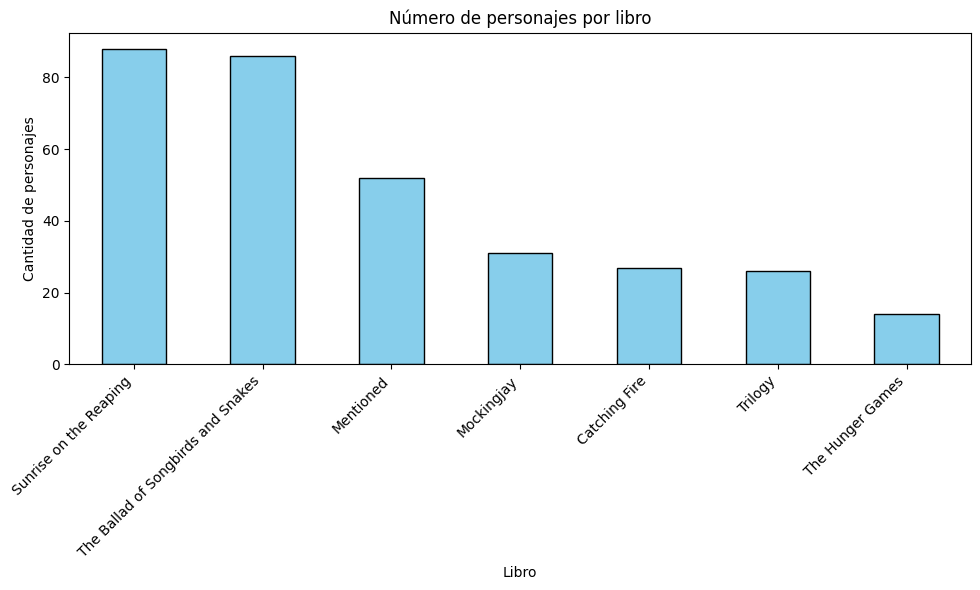

In [73]:
char_per_book(hgDF)

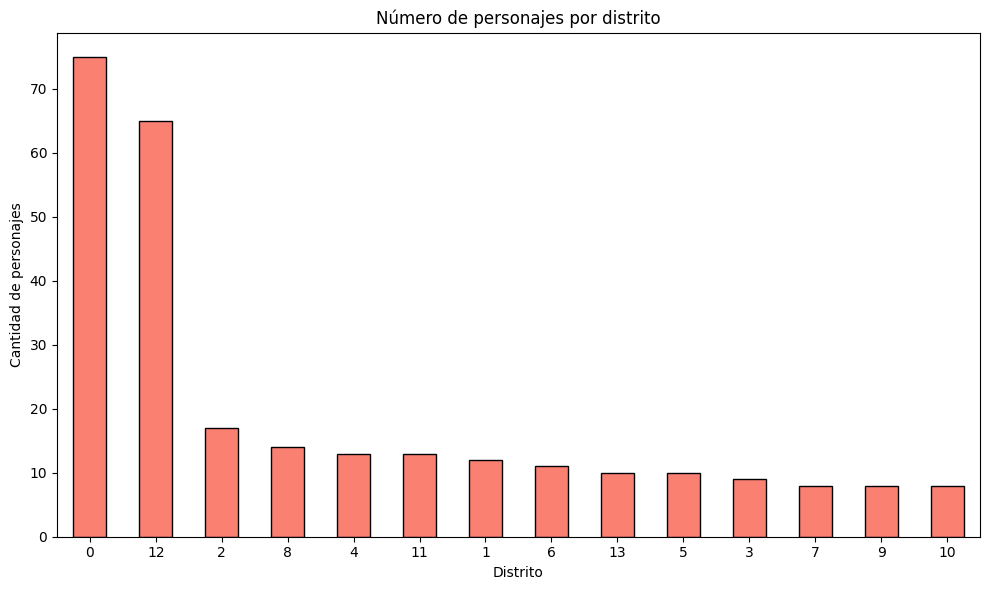

In [74]:
char_per_district(hgDF)

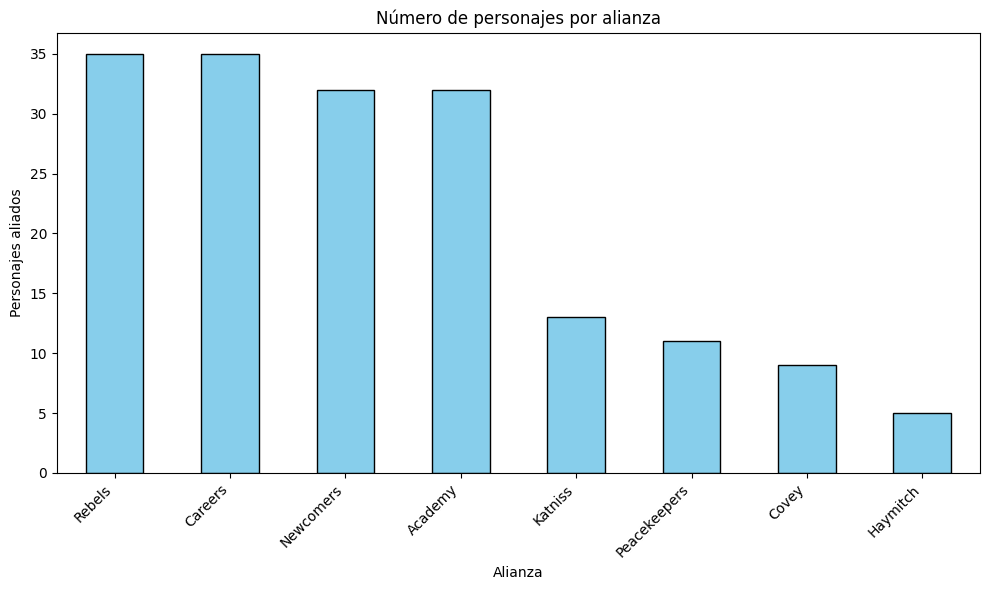

In [75]:
char_per_alliance(hgDF)

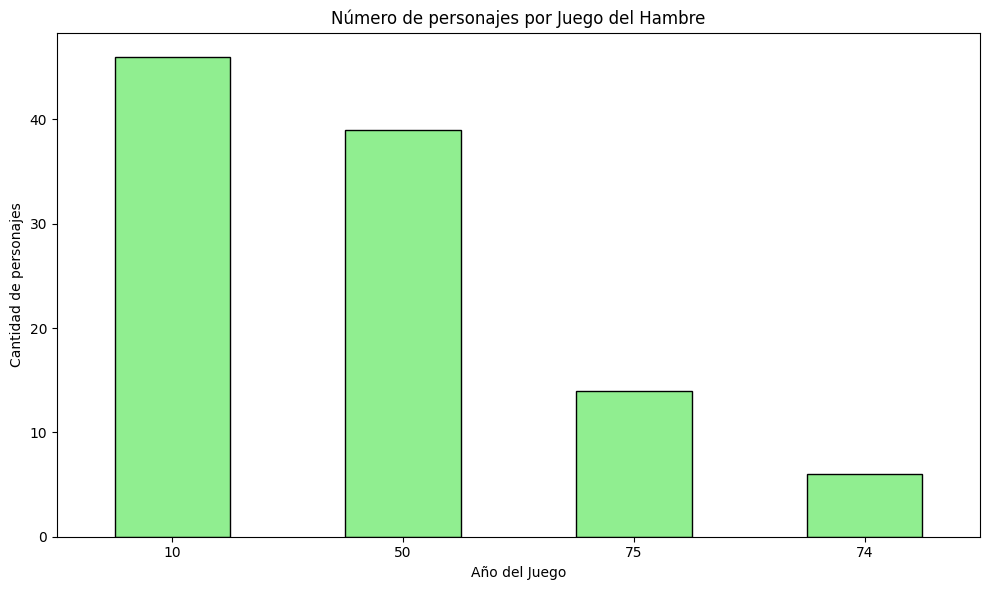

In [76]:
char_per_game(hgDF)

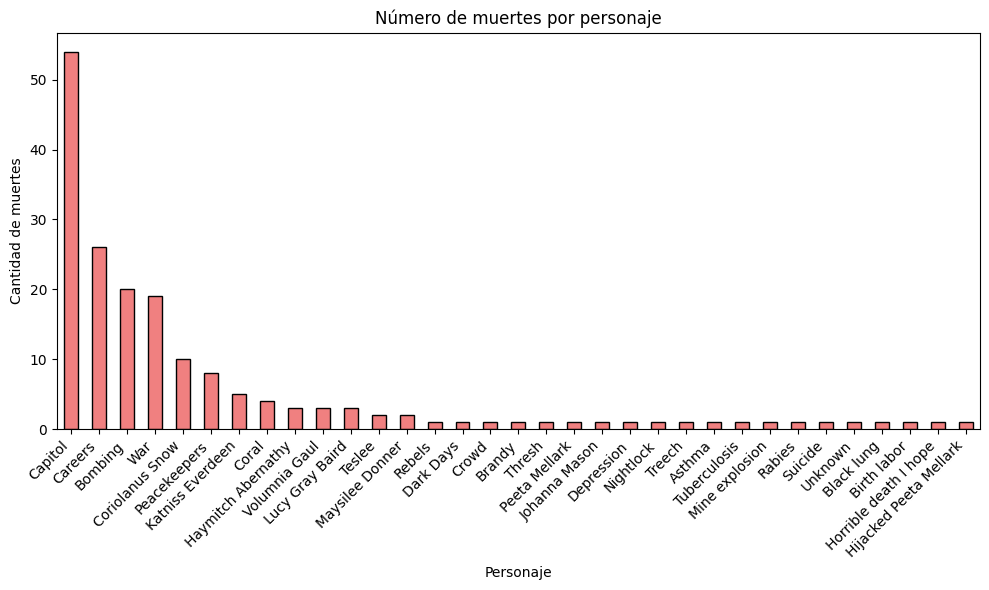

In [77]:
deaths_per_character(hgDF)